In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [338]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [339]:
#let's check the shape of the data frame

df.shape

(9240, 37)

In [340]:
#let's check the info() method and the datatype of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [341]:
#let's check the null values percentage

round(df.isnull().sum() * 100/ 9240,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
Specialization                                   15.563
How did you hear about X Education               23.885
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                        

#### We clearly see that we have more than 30% of missing data in some of the columns

In [342]:
#let's check the 'select' value in the columns, which can be considered as a null value.
cols = list(df.columns)
selectList = [round(len(df[df[i] == 'Select'][i])/9240,2) for i in cols]

[(cols[i], selectList[i])for i in range(0,len(selectList)-1) if (selectList[i] > 0)]

[('Specialization', 0.21),
 ('How did you hear about X Education', 0.55),
 ('Lead Profile', 0.45),
 ('City', 0.24)]

#### We can see four columns have values as Select

In [343]:
df[~df['Asymmetrique Activity Index'].isnull()]['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [344]:
df['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [345]:
df['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

In [346]:
[i[3:] for i in df['Asymmetrique Activity Index'].unique() if type(i)== str]

['Medium', 'High', 'Low']

In [347]:
df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [348]:
 df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].apply(lambda x : x[3:] if type(x) == str else x)

In [349]:
 df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].apply(lambda x : x[3:] if type(x) == str else x)

In [350]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


<AxesSubplot:>

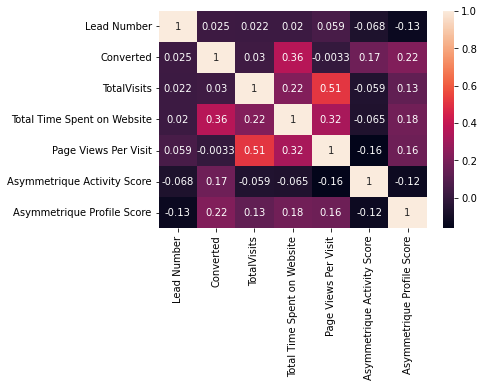

In [351]:
sns.heatmap(df.corr(), annot=True)

In [352]:
df['Asymmetrique Profile Index'].value_counts(normalize=True)

Medium    0.555157
High      0.438670
Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64

In [353]:
df['Asymmetrique Profile Index'].map({'Low':0, 'Medium':1, 'High':2}).median()

1.0

In [354]:
df['Asymmetrique Activity Index'].value_counts(normalize=True)

Medium    0.764436
High      0.163481
Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [355]:
df['Asymmetrique Activity Index'].map({'Low':0, 'Medium':1, 'High':2}).median()

1.0

In [356]:
df['Asymmetrique Activity Score'].median()

14.0

In [357]:
df['Asymmetrique Activity Score'].value_counts(normalize=True)

14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64

In [358]:
df['Asymmetrique Profile Score'].median()

16.0

In [359]:
df['Asymmetrique Profile Score'].value_counts(normalize=True)

15.0    0.350259
18.0    0.213262
16.0    0.119275
17.0    0.115293
20.0    0.061330
19.0    0.048785
14.0    0.045002
13.0    0.040621
12.0    0.004381
11.0    0.001792
Name: Asymmetrique Profile Score, dtype: float64

##### Asymetrique Activity Score and Asymetrique Profile Score continues values are binned into 3 categories, which are low, medium, and high. These values are stored inside the Asymetrique Acitvity Index and Asymetrique Profile Index, hence we can take the median values and replace them with the null values 

In [360]:
# Asymetrique Activity Index is important in the model even though it has very High missing 
# values we can't drop this, hence we shall fill the values with the Medium

df['Asymmetrique Activity Index'].fillna(value="Medium", inplace=True)
df['Asymmetrique Profile Index'].fillna(value="Medium", inplace=True)
df['Asymmetrique Activity Score'].fillna(value=14.0, inplace=True)
df['Asymmetrique Profile Score'].fillna(value=16.0, inplace=True)

In [361]:
#Check the null value count again.

df[['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index']].isnull().sum()

Asymmetrique Profile Score     0
Asymmetrique Activity Score    0
Asymmetrique Profile Index     0
Asymmetrique Activity Index    0
dtype: int64

In [362]:
df.City.unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [363]:
df.Country.unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [364]:
# we can drop City as 15% of the value is na and 24% is Select which is also a null type here, and there are not much unique value when compared to Country.

df.drop(labels='City', inplace=True, axis=1)

In [365]:
df.shape

(9240, 36)

In [366]:
df.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [367]:
# 95% of the values are from India, hence we shall be replacing the null values with India

df.Country.fillna(value="India", inplace=True)

In [368]:
df.Country.isnull().sum()

0

In [369]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [370]:
# almost 75% of the data is null (NaN and Select), hence we can drop this

df.drop(labels='Lead Profile', axis=1, inplace=True)

In [371]:
df.shape

(9240, 35)

In [372]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [373]:
df['Lead Quality'].value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: Lead Quality, dtype: float64

In [374]:
# we can drop Lead Quality as it's 51% of the data is missing

df.drop(labels="Lead Quality", axis=1, inplace=True)

In [375]:
df.shape

(9240, 34)

In [376]:
df.Tags.unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [377]:
df.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [378]:
# 35% of the tags are marked as 'Will revert after reading the email', hence we shall be marking this tag for missing data

df.Tags.fillna(value='Will revert after reading the email', inplace=True)

In [379]:
df.Tags.isnull().sum()

0

In [380]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [381]:
df['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64

In [382]:
df['Lead Source'].mode()

0    Google
Name: Lead Source, dtype: object

In [383]:
# we can replace the missing values with Google for Lead source

df['Lead Source'].fillna(value='Google', inplace=True)

In [384]:
df['Lead Source'].isnull().sum()

0

In [385]:
df['TotalVisits'].median()

3.0

In [386]:
df.TotalVisits.fillna(value=3.0, inplace=True)

In [387]:
df['Page Views Per Visit'].median()

2.0

In [388]:
df['Page Views Per Visit'].fillna(value=2.0, inplace=True)

In [389]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [390]:
df['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [391]:
df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [392]:
df['Last Activity'].fillna(value='Email Opened', inplace=True)

In [393]:
df.Specialization.unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [394]:
df.Specialization.mode()

0    Select
Name: Specialization, dtype: object

In [395]:
# 21 % of the values are Select, which is a type of null value
df.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [396]:
# there is not dominant specialization to replace it with and there is almost 36% of the values are null,
# we have to drop this.

df.drop(labels='Specialization', axis=1, inplace=True)

In [397]:
df.shape

(9240, 33)

In [398]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [399]:
df['How did you hear about X Education'].value_counts(normalize=True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [400]:
# more than 70% of the values are missing, lets drop this columns

df.drop(labels='How did you hear about X Education', axis=1, inplace=True)

In [401]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [402]:
df['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [403]:
df['What is your current occupation'].fillna(value='Unemployed', inplace=True)

In [404]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [405]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [406]:
df['What matters most to you in choosing a course'].fillna(value='Better Career Prospects', inplace=True)

In [407]:
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [425]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [417]:
cols = [i for i in cols if i not in ['Specialization', 'How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'City']]
#zip(cols, df[cols].unique())

In [426]:
[(i, df[i].unique(), type(df[i])) for i in cols]

unique_cols = [df[i].unique() for i in cols]
dataType = [df[i].dtype for i in cols]
u_df = pd.DataFrame({"cols":cols, "unique":unique_cols, "dataType": dataType})
u_df

,cols,unique,dataType
0,Prospect ID,"[7927b2df-8bba-4d29-b9a2-b6e0beafe620, 2a27243...",object
1,Lead Number,"[660737, 660728, 660727, 660719, 660681, 66068...",int64
2,Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",object
3,Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",object
4,Do Not Email,"[No, Yes]",object
5,Do Not Call,"[No, Yes]",object
6,Converted,"[0, 1]",int64
7,TotalVisits,"[0.0, 5.0, 2.0, 1.0, 4.0, 8.0, 11.0, 6.0, 3.0,...",float64
8,Total Time Spent on Website,"[0, 674, 1532, 305, 1428, 1640, 71, 58, 1351, ...",int64
9,Page Views Per Visit,"[0.0, 2.5, 2.0, 1.0, 4.0, 8.0, 2.67, 11.0, 5.0...",float64


#### all the data types are proper

In [430]:
# we don't need Prospect ID, Lead Number as they are unique identification nubmers. 
# And Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content
# Get updates on DM Content, I agree to pay the amount through cheque all these have single value NO and these will be 
# No useful for us

df.drop(labels=['Prospect ID', 'Lead Number', 'Magazine', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque'], axis=1, inplace=True)

df.shape

(9240, 25)

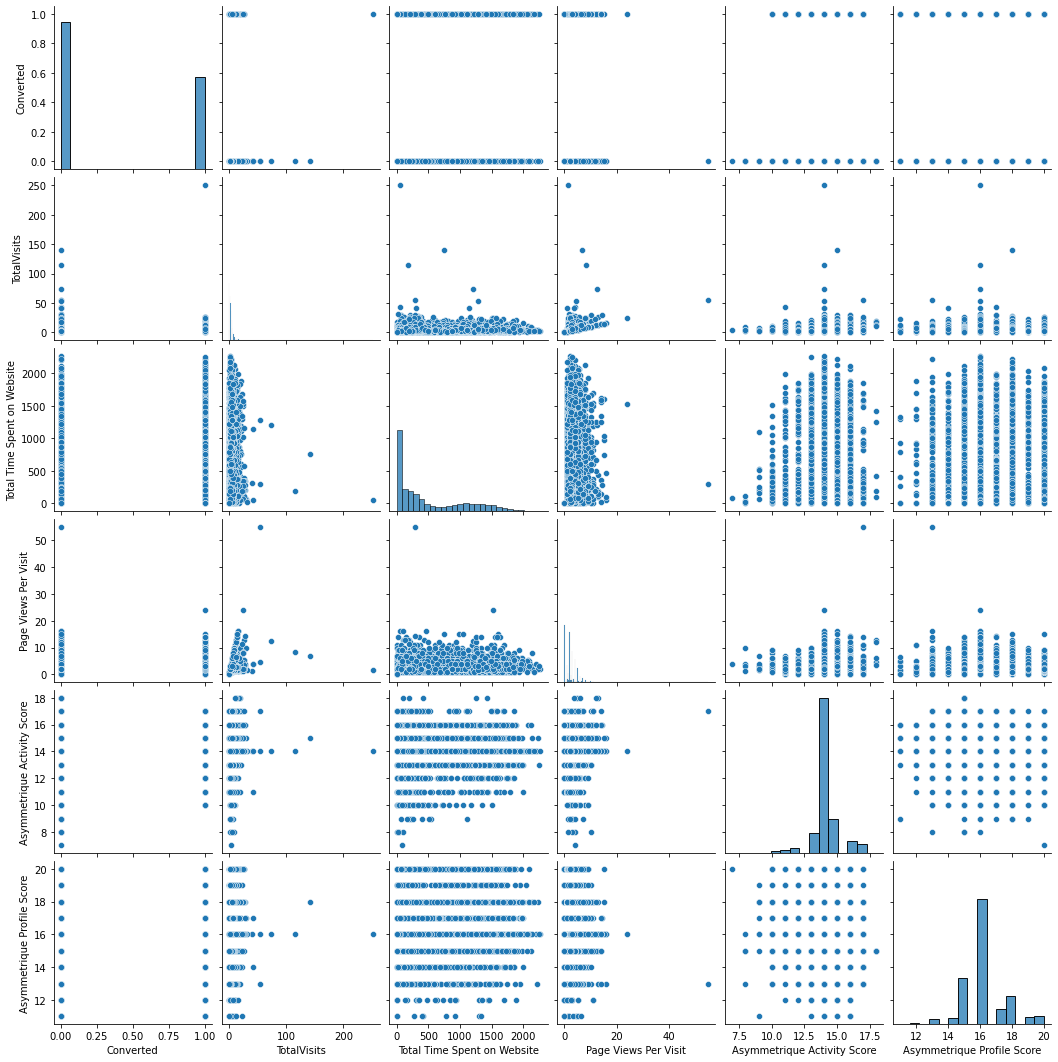

In [431]:
sns.pairplot(data=df)
plt.show()

In [432]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')